# Projeto de Phishing URL


Este projeto tem como finalidade descobrir pela URL do site se ele é um ataque Phishing.

<a href="https://br.malwarebytes.com/phishing/">Veja aqui o que é um ataque phishing...</a>


O projeto de detecção de Phishing se dará por 2 datasets, a fonte deles do kaggle esta abaixo:

https://www.kaggle.com/datasets/sunnykusawa/phishing-urls

https://www.kaggle.com/datasets/taruntiwarihp/phishing-site-urls

Porque iremos utilizar 2 datasets? 

Vamos começar pelo segundo dataset: ele tem mais de 500 mil registros, mas apenas 2 features, a URL e a indicação se é phishing ou não. Ele servirá para dois objetivos, teste dos modelos criados apartir do primeiro dataset, mas tambem para manipular e criar features apartir da URL. Ou seja, depois da conclusão do projeto, podemos fazer um deploy criando uma extensão para o navegador, no caso Google Chrome e ter pronto como tirar as caracteristicas da URL.

O primeiro dataset servirá como treinamento e teste dos modelos. Realizaremos os procedimentos comuns de uma analise preditiva, somente quando os os tratamentos e modelagem estiverem prontos que vamos testar no dataset maior.

# Porque fazer o contrário

Isto é, deveriamos usar o dataset maior de 500 mil linhas para fazer o treinamento e modelagem, não o menor dataset de apenas 2 mil linhas. Embora o dataset maior não tenha as features, então é só fazer as features de acordo com o dataset menor, o objetivo vai ser o mesmo.

Bem isso pode ser verdade, entretanto, este projeto irá servir de aprendizagem para deploy. Então a situação é a seguinte, estou treinando um modelo para verificar se a URL é phishing. Então, o primeiro dataset vai servir para esta finalidade criar o modelo. Mas o segundo dataset vai servir para verificar como o modelo se comporta em quantidades massivas, então vai mostrar o quão o modelo se sai melhor em outros registro; Mas claro isso não é o deploy ainda, então eu tambem quero treinar o *re-treino* do modelo, ou seja, conforme vou passando os registros, a cada mil linhas, ou 10 mil registro o modelo vai re-treinando para estes novos dados. Ou seja o dataset maior como já citado tem 2 objetivos:

 - Verificar como o modelo treinado em poucos dados se sai em muitos dados;
 
 - Treinar o deploy de maneira que o modelo possa re-treinar conforme vou passando novos registros.

**Para entender o dicionário abaixo, precisamos entender a estrutura de uma URL**

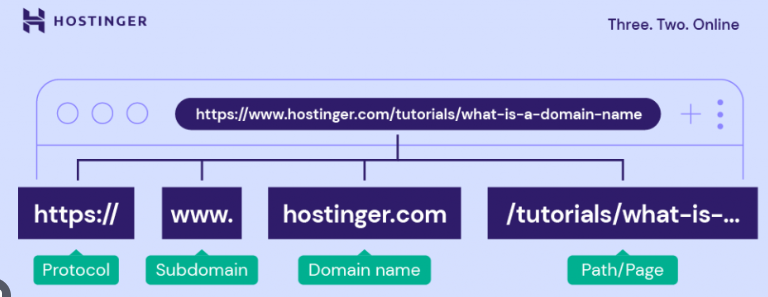

**Dicionário de dados do primeiro dataset**

| Feature               | Descrição                                                                                          |
|-----------------------|----------------------------------------------------------------------------------------------------|
| 'url_length'          | Número total de caracteres na URL completa                                                         |
| 'valid_url'           | Indica se a URL está ativa e pode recuperar conteúdo da internet                                   |
| 'at_symbol'           | Número de vezes que o símbolo '@' apareceu na URL                                                  |
| 'sensitive_words_count'| Quantidade de vezes que palavras sensíveis, como ['confirmar', 'conta', 'seguro', 'webscr', 'banco', 'login', 'entrar', 'confirm', 'account', 'secure', 'webscr', 'banking', 'login', 'signin'], aparecem na URL|
| 'path_length'         | Número de caracteres no caminho da URL                                                             |
| 'isHttps'             | Indica se a URL é segura, utilizando HTTPS + SSL                                                   |
| 'nb_dots'             | Número de vezes que o caractere '.' aparece na URL                                                 |
| 'nb_hyphens'          | Quantidade de vezes que '-' ou traço é utilizado na URL                                            |
| 'nb_and'              | Número de vezes que a palavra 'and' é utilizada na URL                                             |
| 'nb_or'               | Quantidade de vezes que a palavra 'or' está presente na URL                                        |
| 'nb_www'              | Número de vezes que 'www' está presente na string da URL                                           |
| 'nb_com'              | Quantidade de vezes que 'com' aparece na URL                                                        |
| 'nb_underscore'       | Número de vezes que o caractere '_' é utilizado na string da URL                                    |
| 'target'              | Indica se a URL fornecida é uma URL de phishing (0) ou uma URL não maliciosa (1)                  |


## 1. Importando as bibliotecas e os dados

In [1]:
# Bibliotecas para manipulação
import pandas as pd
import numpy as np

# Filtrando os alertas
import warnings
warnings.filterwarnings('ignore')

# Biblioteca para visualização dos dados
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# Configurações para o pandas, permitir a visualização de todas as colunas
pd.set_option('display.max_columns', None)

In [3]:
# Importação dos dados
df = pd.read_csv('data/phishing_url_dataset.csv')

# Visualizando o dataset
df

,url_length,valid_url,at_symbol,sensitive_words_count,path_length,isHttps,nb_dots,nb_hyphens,nb_and,nb_or,nb_www,nb_com,nb_underscore,target
0,42,0,0,0,20,0,2,0,0,0,1,1,0,0
1,73,0,0,0,52,0,5,0,0,0,0,1,0,0
2,73,0,0,0,52,0,5,0,0,0,0,1,0,0
3,73,0,0,0,52,0,5,1,0,1,0,1,0,0
4,73,0,0,0,52,0,5,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2483,50,1,0,0,0,0,4,3,0,0,0,0,0,1
2484,74,1,0,0,0,1,5,0,0,0,0,0,0,1
2485,74,1,0,0,0,1,5,0,0,0,0,0,1,1
2486,74,1,0,0,0,1,5,0,0,0,0,0,0,1


In [4]:
# importação do dataset2
df2 = pd.read_csv('data/phishing_site_others.csv')

# Visualizando os dados
df2

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad
...,...,...
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad


## 2. Realização do Split

Como já explicado na introdução do projeto, o primeiro dataset que estamos trabalhando vai seguir os procedimentos comuns de uma análise e modelagem. Embora Vamos usar a validação cruzada para gerar o melhor modelo, vamos usar o test desta variável como uma forma de verificar e validar o modelo que saiu bem na validação cruzada.

Sabemos que é importante fazer o contrário, afinal o segundo dataset que tem mais de 500 mil registros, então era ele que deveria ser a base para treinamento e modelagem. Mas o porque de estar fazendo o contrário explicado no começo do projeto na seção **Porque fazer o contrário**.

In [5]:
# Importação da biblioteca
from sklearn.model_selection import train_test_split

# Setando a variavel de aleatoriedade
SEED = 300
np.random.seed(SEED)

# Setando as variaveis
X, y = df.drop('target', axis=1), df['target']

# Realizando o split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)

# Verificando as dimensoes
X_train.shape, X_test.shape

((1990, 13), (498, 13))

In [6]:
# Separado train e test vamos juntar e criar novo dado, vamos salvar em formato picke para estar com todas as configurações
X_train['target'] = y_train
df = X_train.copy()

X_test['target'] = y_test
df_test = X_test.copy()

In [7]:
# Visualizando df atualizado com os dados de treino
df

,url_length,valid_url,at_symbol,sensitive_words_count,path_length,isHttps,nb_dots,nb_hyphens,nb_and,nb_or,nb_www,nb_com,nb_underscore,target
1023,67,0,0,0,44,0,5,0,0,0,1,1,1,0
1481,73,0,0,0,0,1,5,0,0,0,0,0,0,1
848,73,0,0,0,0,0,5,2,0,0,0,0,0,0
996,73,0,0,1,50,0,9,1,0,0,0,1,0,0
827,73,0,0,0,51,0,5,3,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,75,1,0,1,26,1,9,0,0,0,0,1,0,1
2178,73,0,0,0,49,0,4,2,0,1,0,1,0,1
416,54,0,0,0,0,0,5,2,0,1,0,0,0,0
892,32,0,0,0,0,0,2,1,0,0,0,0,0,0


## 3. EDA (Análise Exploratória)

In [8]:
# Dimensões do dataset principal
original_shape = df.shape

original_shape

(1990, 14)

In [9]:
# Visualizando as informações das features
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1990 entries, 1023 to 1981
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   url_length             1990 non-null   int64
 1   valid_url              1990 non-null   int64
 2   at_symbol              1990 non-null   int64
 3   sensitive_words_count  1990 non-null   int64
 4   path_length            1990 non-null   int64
 5   isHttps                1990 non-null   int64
 6   nb_dots                1990 non-null   int64
 7   nb_hyphens             1990 non-null   int64
 8   nb_and                 1990 non-null   int64
 9   nb_or                  1990 non-null   int64
 10  nb_www                 1990 non-null   int64
 11  nb_com                 1990 non-null   int64
 12  nb_underscore          1990 non-null   int64
 13  target                 1990 non-null   int64
dtypes: int64(14)
memory usage: 233.2 KB


### 3.1 Verificação de valores ausentes, duplicados e zerados

#### 3.1.1 Verificação de valores ausentes

In [10]:
# Verificando dados ausentes
df.isnull().sum().sum()

0

#### 3.1.2 Verificação de valores duplicados

In [11]:
# Verificando dados duplicados
df.duplicated().sum()

868

In [12]:
# Quantidade de sites phishings e nao phishing
df['target'].value_counts(normalize=True).round(2)

target
0    0.53
1    0.47
Name: proportion, dtype: float64

In [13]:
# Testando a retirada de dados duplicados
df_drop_duplicates = df.drop_duplicates()

df_drop_duplicates['target'].value_counts(normalize=True).round(2)

target
0    0.67
1    0.33
Name: proportion, dtype: float64

**Decisão sobre Dados Duplicados**

Temos 868 registros duplicados isso é quase 44% do dataset, ou seja excluir estes registros resultaria na perda de 44% dos registros. 


A duplicação ocorre quando as 14 features, inclusive a target, serem exatamente iguais. Olhando para o dataset os ultimos 4 registros são exemplos de dados duplicados. Procurei na fonte dos dados se há alguma informação se os dados foram pré-processados realizado alguma tecnica de *oversampling*, visto que a proporção do dataset original é de 53%/47% (considerado equilibrado), retirando os dados duplicados cai para 67%/33% gerando uma desbalanceamento.


É dificil acreditar que coincidentemente 14 features são exatamente iguais, embora as features sejam de certa forma genéricas.


Bem dado considerando todas as possibilidades e maneiras de tratar, como por exemplo: Criar uma nova feature indicando dados duplicados, nomes como 'duplicated_data', 'repeat_data'... Mas vamos **excluir os dados duplicados** isso vai garantir que os dados sejam diferentes de si, depois testaremos no dataset de 500 mil registros se há possibilidade destas 14 features serem repetidas. Caso exista a possibilidade voltaremos aqui e vamos criar na celula abaixo os resultados quando o dataset de 500 mil estiver pronto. Mas no vamos seguir excluindo. 

In [14]:
# Excluindo os dados duplicados
df = df.drop_duplicates()

# resetando o index
df.reset_index(inplace=True)

# Excluindo a coluna index que é gerada
df.drop('index', axis=1, inplace=True)

# Visualizando dimensoes
df.shape

(1122, 14)

In [15]:
# Funcao para mapear as features
def criando_dict_features (df):
    # Verificando os dados unicos de cada features
    dict_features = {'Feature': [], 'Type': [], 'Nunique': [], 'Unique': []}

    # Visualização das features
    for col in df.columns:
        dict_features['Feature'].append(col)
        dict_features['Type'].append('Categorica' if df[col].nunique() <= 2 else 'Numerica')
        dict_features['Nunique'].append(df[col].nunique())
        
        # Ordenando os valores unicos
        lista = df[col].unique().tolist()
        lista.sort()
        dict_features['Unique'].append(lista)

    # Transformando os dados em Dataframe
    df_dict_features = pd.DataFrame(dict_features).sort_values('Nunique', ascending=True)

    return df_dict_features

# Visualizando os dados
df_dict_features = criando_dict_features(df)
df_dict_features

,Feature,Type,Nunique,Unique
1,valid_url,Categorica,2,"[0, 1]"
5,isHttps,Categorica,2,"[0, 1]"
13,target,Categorica,2,"[0, 1]"
8,nb_and,Numerica,3,"[0, 1, 2]"
10,nb_www,Numerica,3,"[0, 1, 2]"
2,at_symbol,Numerica,4,"[0, 1, 8, 9]"
3,sensitive_words_count,Numerica,4,"[0, 1, 2, 3]"
9,nb_or,Numerica,4,"[0, 1, 2, 3]"
11,nb_com,Numerica,4,"[0, 1, 2, 3]"
12,nb_underscore,Numerica,8,"[0, 1, 2, 3, 4, 5, 6, 7]"


**Objetivo da função**

Esta funcao além de mapear as features, mostrar separar o tipo como Categorica e Numerica, quantidade de valores unicos e os valores unicos, ela tambem **serve para observar se há valores ausentes diferentes de NaN, podendo ser -1 ou qualquer outro valor.**

Neste caso, nota-se que nas variáveis não valores negativos, então realmente *não há valores ausentes tanto como NaN, Null ou valores diferentes*

In [16]:
# Função para calcular valores zerados por coluna
def func_calc_percentual_valores_zerados(df):
    
    # Total de valores zerados
    df_zerado = (df == 0).sum()

    # Porcentagem de valores zerados
    df_zerado_percent = 100 * df_zerado / len(df)

    # Tipo de dado das colunas com valores zerados
    df_zerado_dtype = df.dtypes

    # Cria uma tabela com os resultados
    df_zerado_table = pd.concat([df_zerado, df_zerado_percent, df_zerado_dtype], axis=1)

    # Renomear as colunas
    df_zerado_table_ren_columns = df_zerado_table.rename(columns = {0 : 'Valores Zerados', 
                                                                    1 : '% de Valores Zerados', 
                                                                    2: 'Dtype'})

    # Classifica a tabela por porcentagem de valores zerados de forma decrescente e remove colunas sem valores faltantes
    df_zerado_table_ren_columns = df_zerado_table_ren_columns[df_zerado_table_ren_columns.iloc[:,0] != 0].sort_values('% de Valores Zerados', ascending = False).round(2)

    # Print 
    print (f"O dataset tem {df.shape[0]} registros.\n")

    if df_zerado_table_ren_columns.shape[0] == 0:
        return

    # Retorna o dataframe com informações
    return df_zerado_table_ren_columns

#### 3.1.3 Proporção de valores zerados

In [17]:
# Aplicando a visualização de colunas com proporção de valores zeros
df_zerado = func_calc_percentual_valores_zerados(df)

# Visualizando
df_zerado

O dataset tem 1122 registros.



,Valores Zerados,% de Valores Zerados,Dtype
at_symbol,1116,99.47,int64
nb_and,1099,97.95,int64
nb_underscore,1018,90.73,int64
valid_url,993,88.50,int64
sensitive_words_count,979,87.25,int64
nb_or,852,75.94,int64
isHttps,809,72.10,int64
nb_www,804,71.66,int64
target,752,67.02,int64
nb_hyphens,731,65.15,int64


**Decisão sobre a Proporção de valores zerados**

A ideia de utilizar esta proporção é ver se a feature terá importância, afinal uma feature com apenas valores zerados não terá relevância. Bem levando em consideração que o dataset é pequeno, vamos estabelecer uma proporção de até 90%, ou seja, **toda feature que tem proporção maior que 90%** de valor zero, vamos excluir. Isso significará que outras features terá uma relevancia.

In [18]:
# Colunas com proporção acima de 90%
drop_cols_zeradas = [feature for feature, row in df_zerado.iterrows() if (row['% de Valores Zerados'] >= 90.0)]

# Verificando se pegou as colunas corretamente
drop_cols_zeradas

['at_symbol', 'nb_and', 'nb_underscore']

In [19]:
# Excluindo as colunas
df = df.drop(columns=drop_cols_zeradas, axis=1)

**Decisões Tomadas**

1. Exclusão de dados duplicados para não atrapalhar o modelo na modelagem, (pode ser desfeito caso as features tenha possibilidade de serem iguais);

2. Exclusão de features cuja a proporção de valores zerados fossem maior que 90%, trazendo relevancia para as features.

### 3.2 Verificação de Outliers

Para esta etapa vou utilizar algumas bibliotecas que foram dadas no curso de FADA (Formação Analista de Dados - Data Science Academy), este arquivo ele calcula outliers com base no boxplot com base no IQR * 1.5, assim ele identifica de forma tabular as features. Claro com o histograma e boxplot podemos identificar a presença de outliers. Mas este dataframe nos dá informações tabulares ideais para quando se há muitas features, ao invés de plotar vários boxplots ou histograma.

A parte de outliers é uma classe, portanto, visualizar e tratar os outliers são métodos desta classe. Já a parte de limpar e tratar os dados são funções.

In [20]:
# Importando a biblioteca
import libs.preprocessor as pp

In [21]:
# Vamos iniciar a classe dos outliers
outliers = pp.Outlier(df)

In [22]:
# Pegando as variaveis numericas, para isso precisamos atualizar a variavel 'df_dict_features', visto que já fizemos algumas
# alterações
df_dict_features = criando_dict_features(df)

# pegando as variaveis numéricas
cols_num = [row['Feature'] for feature, row in df_dict_features.iterrows() if (row['Type'] == 'Numerica')]

# Verificando se pegou as colunas corretamente
print(cols_num)
print(f'Quantidade de features numericas: {len(cols_num)}')

['nb_www', 'sensitive_words_count', 'nb_or', 'nb_com', 'nb_hyphens', 'nb_dots', 'path_length', 'url_length']
Quantidade de features numericas: 8


In [23]:
# Visualizando os outliers
outliers.getOverview(cols_num)

Nome de Coluna,nb_or,sensitive_words_count,nb_hyphens,nb_dots,nb_com,nb_www,path_length,url_length
Min,0,0,0,0,0,0,0,13
Q1,0.0,0.0,0.0,2.0,0.0,0.0,0.0,31.0
Median,0.0,0.0,0.0,5.0,1.0,0.0,2.0,56.0
Q3,0.0,0.0,1.0,5.0,1.0,1.0,33.0,73.0
Max,3,3,10,13,3,2,57,75
IQR,0.0,0.0,1.0,3.0,1.0,1.0,33.0,42.0
Lower fence,0.0,0.0,-1.5,-2.5,-1.5,-1.5,-49.5,-32.0
Upper fence,0.0,0.0,2.5,9.5,2.5,2.5,82.5,136.0
Skew,1.950017,2.89419,2.173509,0.216779,0.134487,1.146798,0.819255,-0.273556
Num_Outliers,270,143,134,5,2,0,0,0


**Decisão sobre os Outliers**

O percentual de outliers para as features não é tão grande, logo, não precisa de um tratamento para diminuir. Além disso nota-se que algumas variáveis tem uma assimetria no intervalo de (-0.5, 0.5) isso significa que os dados tem uma uma distribuição aproximadamente simétrica.

Bem indentficamos que algumas variáveis tem outliers, mas também não é tão significativo. Portanto, não iremos tratar, até mesmo, as vezes a presença destes dados discrepantes pode reforçar a predição de outliers ou não.

## 4. Análise Descritiva

In [24]:
# Visualizando as features
df_dict_features

,Feature,Type,Nunique,Unique
1,valid_url,Categorica,2,"[0, 1]"
4,isHttps,Categorica,2,"[0, 1]"
10,target,Categorica,2,"[0, 1]"
8,nb_www,Numerica,3,"[0, 1, 2]"
2,sensitive_words_count,Numerica,4,"[0, 1, 2, 3]"
7,nb_or,Numerica,4,"[0, 1, 2, 3]"
9,nb_com,Numerica,4,"[0, 1, 2, 3]"
6,nb_hyphens,Numerica,9,"[0, 1, 2, 3, 4, 5, 6, 7, 10]"
5,nb_dots,Numerica,12,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13]"
3,path_length,Numerica,57,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."


### 4.1 Analisando a Variável Target

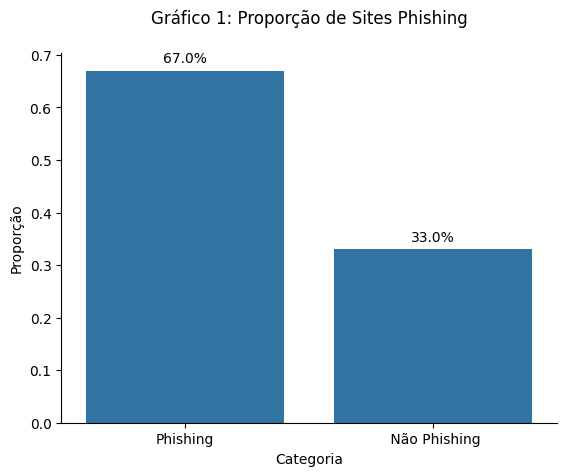

In [25]:
# Calcula a proporção de sites Phishing
phishing = df['target'].value_counts(normalize=True).round(2)

# Cria o gráfico de barras
ax = sns.barplot(x=phishing.index, y=phishing)

# Adiciona os textos (valores) em cima das barras
for index, value in enumerate(phishing):
    ax.text(index, value + 0.01, str(f'{value*100}%'), ha='center', va='bottom')

# Substitui os valores de 0 e 1 pelos rótulos desejados no eixo x
ax.set_xticklabels(['Phishing', ' Não Phishing'])

# Adiciona rótulos ao gráfico
plt.xlabel('Categoria')
plt.ylabel('Proporção')
plt.title('Gráfico 1: Proporção de Sites Phishing\n')

# Remove as bordas superior e direita
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Exibe o gráfico
plt.show()

**Falando sobre o gráfico**

Como já discutido há um desbalanceamento entre as classes da variavel 'target'. Na parte de modelagem, podemos usar como hiperparametro o uso de tecnicas de *oversampling* ou *undersampling*.

### 4.2 Analisando as Variáveis Categoricas

#### 4.2.1 Analisando a feture 'isHttps'

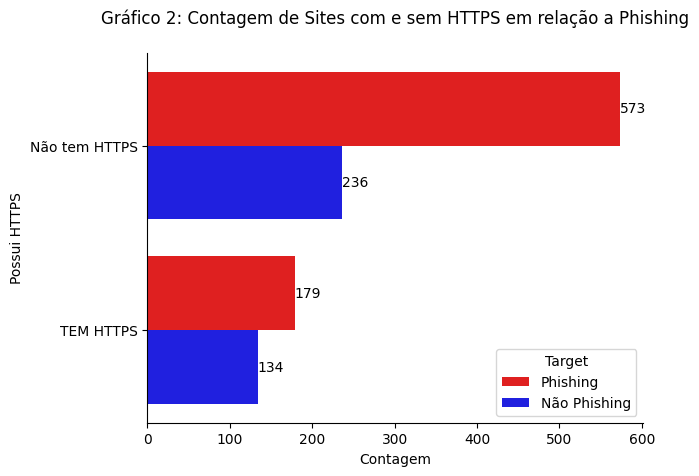

In [26]:
# Cria o gráfico de contagem
ax = sns.countplot(data=df, y='isHttps', hue='target', palette={0: 'red', 1:'blue'})

# Adiciona rótulos ao gráfico
plt.title('Gráfico 2: Contagem de Sites com e sem HTTPS em relação a Phishing\n')

# Remove as bordas superior e direita
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adicionando os labels de y da variavel 'isHttps'
ax.set_yticklabels(['Não tem HTTPS', 'TEM HTTPS'])

# Adiciona rótulos aos eixos
plt.xlabel('Contagem')
plt.ylabel('Possui HTTPS')

# Adiciona legenda
plt.legend(title='Target', loc='lower right', labels=['Phishing', 'Não Phishing'])

# Adiciona os valores ao lado das barras (evita adicionar texto para valores zero)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    
    # Verifica se a largura é maior que zero antes de adicionar o texto
    if width > 0:
        ax.text(x + width + 0.1, y + height / 2, f'{int(width)}', ha='left', va='center')

# Exibe o gráfico
plt.show()

**Sobre o gráfico**

Antes de tirarmos qualquer conclusão é preciso lembrar que nossos dados estão desbalanceados, isto é, existem mais dados com caracteristica de ser phishings de acordo com o *Gráfico 1*.

Podemos notar a grande diferença ou redução de sites quando não tem HTTPS para HTTPS, embora no dois grupos com ou sem certificado HTTPS a presença de sites phishings é a maioria, quando não tem HTTPS a chance de ter um site phishing é maior. Mas pode surgir a pergunta: Será que é maior porque há mais dados phishings?

Logo esta feature 'isHttps' não parece ter uma forte predição, visto que, a unica coisa que podemos notar é que o certificado HTTPS conseguiu diminuir os dados de ataques phishings, mas ele ainda é maioria neste grupo, apenas equilibrou as chances.

#### 4.2.2 Analisando a feature 'valid_url'

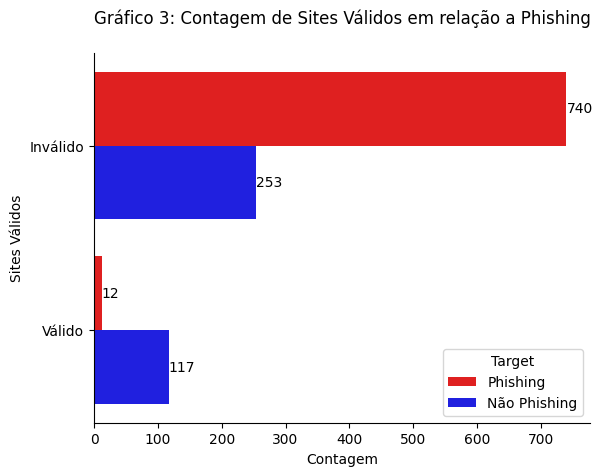

In [27]:
# Cria o gráfico de contagem
ax = sns.countplot(data=df, y='valid_url', hue='target', palette={0: 'red', 1:'blue'})

# Adiciona rótulos ao gráfico
plt.title('Gráfico 3: Contagem de Sites Válidos em relação a Phishing\n')

# Remove as bordas superior e direita
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adicionando os labels de y da variavel 'isHttps'
ax.set_yticklabels(['Inválido', 'Válido'])

# Adiciona rótulos aos eixos
plt.xlabel('Contagem')
plt.ylabel('Sites Válidos')

# Adiciona legenda
plt.legend(title='Target', loc='lower right', labels=['Phishing', 'Não Phishing'])

# Adiciona os valores ao lado das barras (evita adicionar texto para valores zero)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    
    # Verifica se a largura é maior que zero antes de adicionar o texto
    if width > 0:
        ax.text(x + width + 0.1, y + height / 2, f'{int(width)}', ha='left', va='center')

# Exibe o gráfico
plt.show()

**Sobre o gráfico**

Esta feature `'valid_url'` parece ter uma visualização mais fácil em relação a sites Phishings. Nota-se que sites inválidos, ou cuja URL **não está ativa** há forte ocorrência de ataque Phishing. Fica bem claro a diferença, a maioria dos ataques são url inválidas. Portanto, a uma forte tendencia que os sites phishings tenha a ulr inativa ou inválida.

A respeito de sites não phishing não há uma tendencia clara, visto que, em ambas classes sobre URL inválida ou válida há presença de sites não phishings.

<Figure size 1200x1200 with 0 Axes>

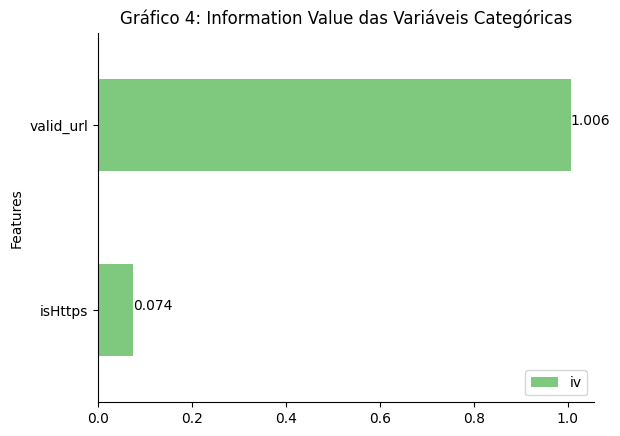

In [28]:
# Plot do Information Value (IV)

# Variaveis Categoricas
cols_cat = ['valid_url', 'isHttps']

# Lista para o IV
iv = []

# Loop
for i in cols_cat:
    df_woe_iv = (pd.crosstab(df[i], df['target'], normalize = 'columns')
                .assign(woe = lambda dfx: np.log(dfx[1] / dfx[0]))
                .assign(iv = lambda dfx: np.sum(dfx['woe'] * (dfx[1] - dfx[0]))))
    iv.append(df_woe_iv['iv'][0])
    
# IV em dataframe
df_iv = pd.DataFrame({'Features': cols_cat, 'iv':iv}).set_index('Features').sort_values(by='iv')

# Gráfico do Dataframe
# Criando uma figura
plt.figure(figsize = (12, 12))

# Criando um gráfico de barras
df_iv.plot(kind = 'barh', title = 'Gráfico 4: Information Value das Variáveis Categóricas', colormap = 'Accent')

# Loop para inserir os valores em cada barra
for index, value in enumerate(list(round(df_iv['iv'], 3))):
    plt.text((value), index, str(value))
    
# Remove as bordas superior e direita
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


# Legenda
plt.legend(loc = 'lower right')
plt.show()

**Sobre o gráfico**

Conforme observamos na avaliação de cada feature observamos que a feature `'valid_url'` tem uma força preditiva muito maior que a variavel `'isHttps'`. Entretanto este valor de Information Value para a feature *valid_url* de 1.006 está acima do normal, levando em conta que valores acima de 0.50 é considerado um valor anormal na predição, levando preocupação na qualidade dos dados. Isso quer dizer que a isHttps pode ser uma feature enviesada na predição dos dados na parte de modelagem.

A respeito da feature `'isHttps'` notamos o valor de 0.074 e seguindo a tabela tem uma associação fraca.


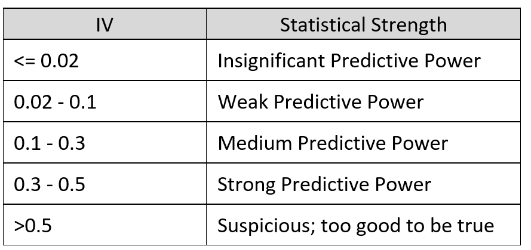

Fonte da tabela: https://www.k2analytics.co.in/information-value-concept-in-scorecard-development/

### 4.3 Analisando as Variáveis Numéricas

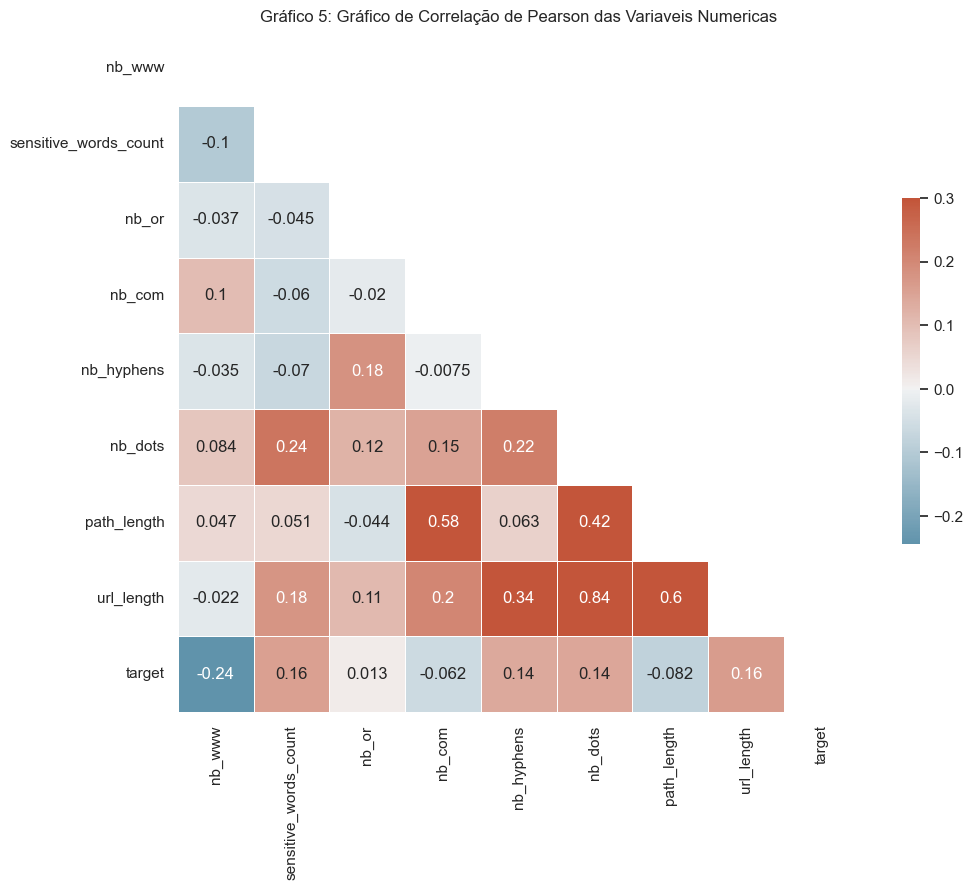

In [29]:
# Adicionando a variavel alvo nas variaveis numericas
cols_num.append('target')

# Criando df de correlação de Pearson
corr = df[cols_num].corr()

# Setando o estilo do gráfico
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True , vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


ax.set_title("Gráfico 5: Gráfico de Correlação de Pearson das Variaveis Numericas")


plt.show()

**Sobre o gráfico**

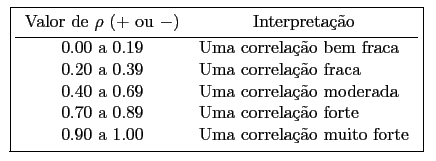

fonte: http://www.leg.ufpr.br/~silvia/CE055/node102.html

A correlação com a variavel target, a que se destaca é a feature `'nb_wwww'` (contabiliza o numero de www) que possui uma **correlação fraca negativa**, depois as features possui uma correlação bem fraca quase fraca, ou seja, não há uma correlação forte das variaveis numericas com a variavel target.

Mas podemos considerar e entender algumas variaveis:

- **Correlação Forte Positiva** entre `'url_length'` com `'nb_dots'` de 0.84, isso mostra uma correlação no aumento da URL com o aumento da quantidade de '.' (pontos), geralmente em uma URL é comum ter dois pontos ou 3 pontos(exemplo: www.globo.com ou www.google.com.br);


- **Correlação Moderada Positiva** várias correlações, vamos citar algumas: `'url_length'` com `'path_length'`, isso também faz sentido, conforme a figura no inicio do notebook podemos ver o que se refere o path, claramente, uma URL que tenha path será maior, e claramente quanto maior o path, maior será a URL; Outra correlação moderada é de `'path_length'` com `'nb_com'` esta geralmente .com é domonio publico muito utilizado e a aparição deste dominio tem correlação com a quantidade de path.


Claro que há outras correlações moderadas entre variaveis, entretanto, não há nada em evidencia com relação a variavel `'target'`, vamos analisar algumas destas variaveis de maneira simplificada.

#### 4.3.1 Analisando a feature 'nb_www'

Possui a maior correlação entre a variavel target conforme no gráfico 5

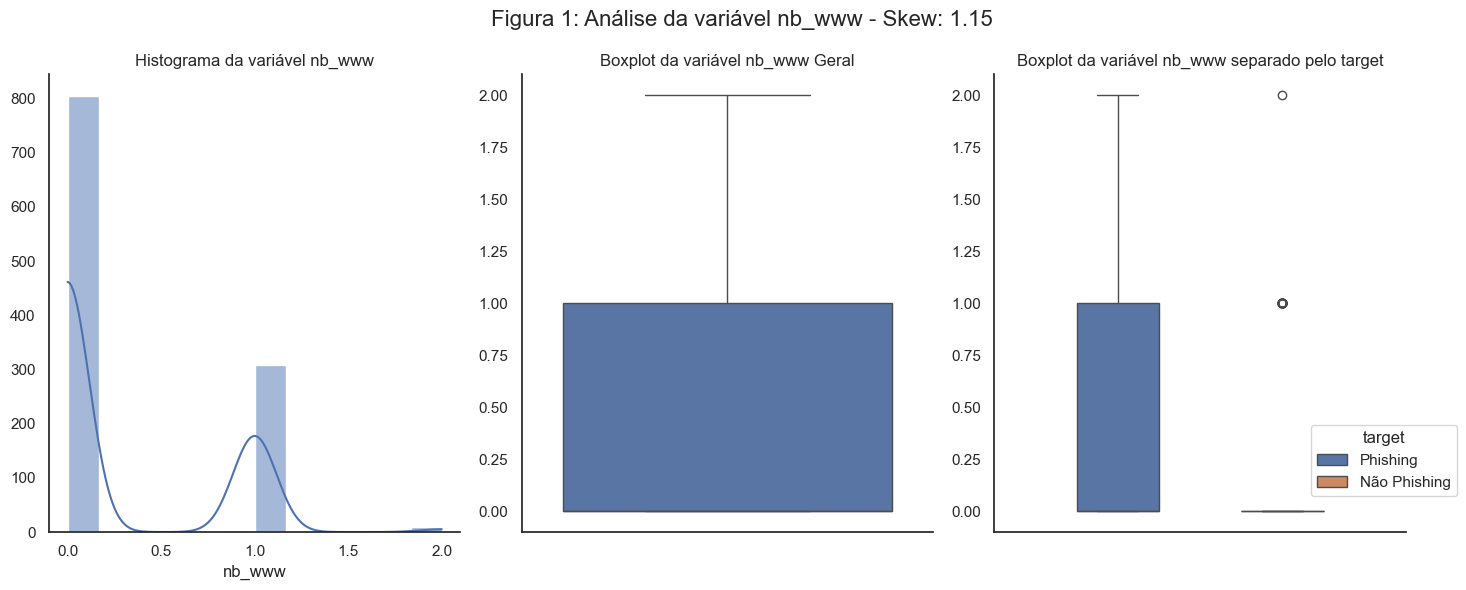

In [30]:
# Verificação da coluna 'url_length'
col = 'nb_www'

# Calculando assimetria
col_ass = df[col].skew().round(2)

# Criando uma figura com tres imagens em linha
fig, axs = plt.subplots(1, 3, figsize = (15, 6))

# Primeira imagem um histograma
axs[0] = sns.histplot(data=df, x=col, ax=axs[0], kde=True)
axs[0].set_title(f'Histograma da variável {col}')
axs[0].set_ylabel('')

# Remove as bordas superior e direita
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

# Segunda imagem um boxplot
axs[1] = sns.boxplot(data=df, y=col, ax=axs[1])
axs[1].set_title(f'Boxplot da variável {col} Geral')
axs[1].set_ylabel('')

# Remove as bordas superior e direita
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

# Terceira imagem um boxplot detalhado pela variavel target
axs[2] = sns.boxplot(data=df, y=col, hue='target',ax=axs[2], gap=0.5)
axs[2].set_title(f'Boxplot da variável {col} separado pelo target')
axs[2].set_ylabel('')

# Remove as bordas superior e direita
axs[2].spines['top'].set_visible(False)
axs[2].spines['right'].set_visible(False)

# Alterando os rótulos da legenda
handles, _ = axs[2].get_legend_handles_labels()
axs[2].legend(handles, ['Phishing', 'Não Phishing'], title='target', bbox_to_anchor=(0.75, 0.25))

# Titulo da figura
fig.suptitle(f'Figura 1: Análise da variável {col} - Skew: {col_ass}', fontsize=16)

# Ajustando os layouts
plt.tight_layout()

# Visualizando a imagem
plt.show()

In [31]:
# Verificando o tamanho a respeito da contagem de www com o target
pd.DataFrame(df.groupby(['target', 'nb_www']).size())

0
target nb_www     
0      0       480
       1       264
       2         8
1      0       324
       1        45
       2         1

**Sobre a Figura**

Ao estudar a feature `'nb_www'` notamos no histograma que ela também tem uma distribuição bimodal, na verdade olhando agora podemos transformar esta variável em categoria, indicando se na URL há presença do 'www' na url. No histograma há uma grande distribuição na contagem para valores 0 (isto é, url's sem a presença de www, url's mais simples) e a contagem de uma aparição de 'www' sendo um pouco maior, mas também há presença de duas aparições na mesma URL de 'www' e conforme vimos no *groupby acima* a maioria dos valores apareceu quando o site era phishing.

Com respeito ao boxplot apenas reforça o que está no histograma, variabilidade entre 0 e 1 e poucos caso de 2 aparições de 'www', bem nota-se que no boxplot detalhado por target, a classe *Não Phishing* a maioria dos seus dados esta com a contagem em 0, isto é, são URL's simplificadas, sendo a aparição como outliers. E verificando no *groupby* que reforça este boxplot detalhado, a feature `'nb_www'` pode ser classificada como categorica, e deixando apenas dois grupos se há a presença de outliers ou não. Vamos fazer uma analise categorica nesta feature e tentar tirar novas informações.

Não há nenhum problema em deixar a feature `'nb_www'` como esta, ou seja, classificar ela como categorica e permanecer com 3 grupos... mas por gosto pessoal acho que fica estranho classificar a feature como categorica visto que ela é uma contagem ou uma quantificação, deste modo, vamos deixar ela binária, como tendo valores sim e não... neste caso criaremos a feature *'have_www'*, 1 indica que tem aparição de 'www' e 0 como não aparece 'www'

In [32]:
# vamos tirar o nome da feature na lista de colunas numericas
cols_num.remove('nb_www')

# Adicionar a nova feature na lista de colunas categoricas
cols_cat.append('have_www')

In [33]:
# Criando a nova feature categorica
df['have_www'] = 0
df['have_www'] = np.where(df['nb_www'] > 0, 1, 0)

# Excluindo a feature
df = df.drop('nb_www', axis=1)

# Verificando a exclusao
df['have_www'].value_counts()

have_www
0    804
1    318
Name: count, dtype: int64

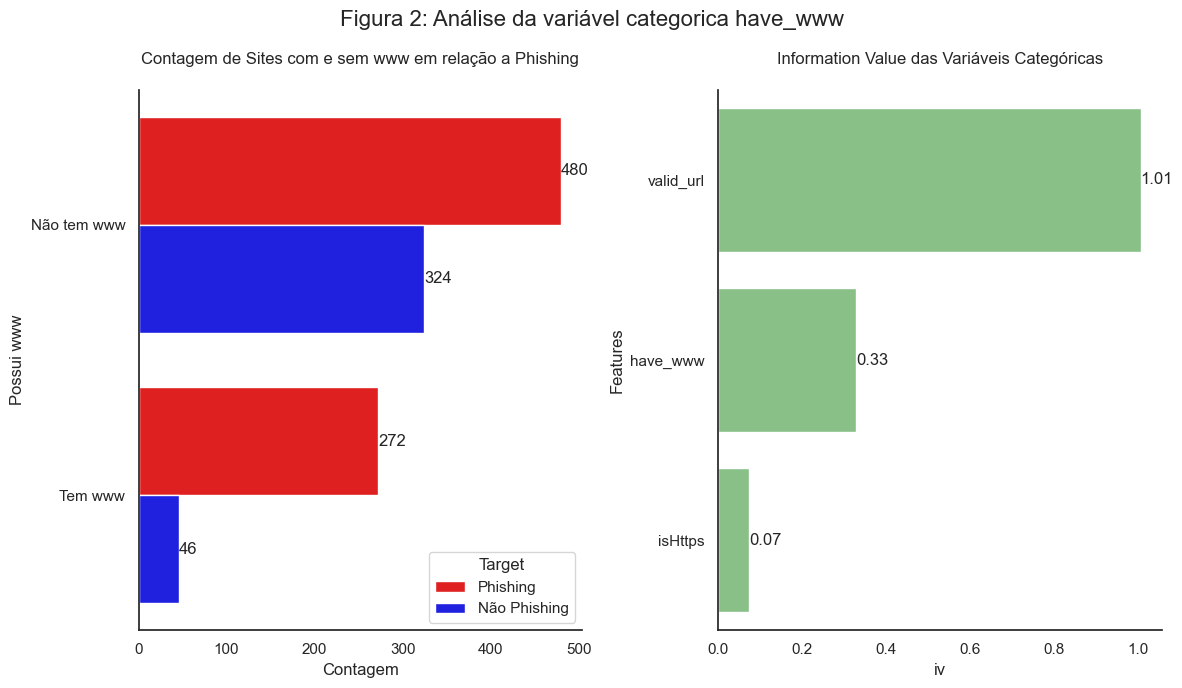

In [34]:
# Analisando a nova feature

# Criando uma figura com tres imagens em linha
fig, axs = plt.subplots(1, 2, figsize = (12, 7))

# Criando o grafico 1
axs[0] = sns.countplot(data=df, y='have_www', hue='target', palette={0: 'red', 1:'blue'}, ax=axs[0])

# Adiciona rótulos ao gráfico
axs[0].set_title('Contagem de Sites com e sem www em relação a Phishing\n')

# Remove as bordas superior e direita
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

# Adicionando os labels de y da variavel 'isHttps'
axs[0].set_yticklabels(['Não tem www', 'Tem www'])

# Adiciona rótulos aos eixos
axs[0].set_xlabel('Contagem')
axs[0].set_ylabel('Possui www')

# Adiciona legenda
axs[0].legend(title='Target', loc='lower right', labels=['Phishing', 'Não Phishing'])

# Adiciona os valores ao lado das barras (evita adicionar texto para valores zero)
for p in axs[0].patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    
    # Verifica se a largura é maior que zero antes de adicionar o texto
    if width > 0:
        axs[0].text(x + width + 0.1, y + height / 2, f'{int(width)}', ha='left', va='center')
        

        
# Plot do Information Value (IV) segunda imagem

# Lista para o IV
iv = []

# Loop
for i in cols_cat:
    df_woe_iv = (pd.crosstab(df[i], df['target'], normalize = 'columns')
                .assign(woe = lambda dfx: np.log(dfx[1] / dfx[0]))
                .assign(iv = lambda dfx: np.sum(dfx['woe'] * (dfx[1] - dfx[0]))))
    iv.append(df_woe_iv['iv'][0])
    
# IV em dataframe
df_iv = pd.DataFrame({'Features': cols_cat, 'iv':iv}).set_index('Features').sort_values(by='iv', ascending=False)

# Criando um gráfico de barras
axs[1] = sns.barplot(data=df_iv, x='iv', y='Features', ax=axs[1], color='#7FC97F')

# Adiciona rótulos ao gráfico
axs[1].set_title('Information Value das Variáveis Categóricas\n')

# Remove as bordas superior e direita
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

# Adicionando os valores ao lado das barras
for p in axs[1].patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    
    # Verifica se a largura é maior que zero antes de adicionar o texto
    if width > 0:
        axs[1].text(width, y + height / 2, f'{width:.2f}', ha='left', va='center')
        
# Titulo da figura
fig.suptitle('Figura 2: Análise da variável categorica have_www', fontsize=16)

        
# Ajustando o layout        
plt.tight_layout() 
    
# Exibe o gráfico
plt.show()

**Sobre a Figura depois das alterações**

Agora que criamos a feature `'have_www'` podemos tirar novas informações, no primeiro gráfico podemos notar que quando a URL não tem www não conseguimos tirar nenhuma informação. Mas quando a URL tem www, nota-se que há uma presença maior de sites phishings, isto é, URL's que apresentam 'www' tem grandes chances de ser phishing.

Além disso, esta nova variável tem uma predição forte levando em conta seu Information Value, ela esta entre 0.3 e 0.5, e esta variavel nao tem um valor enviesado como a 'valid_url', portanto, ao tudo que tudo indica esta nova feature será de grande importância na predição, sendo usada como categorica.

#### 4.3.2 Analisando a feature 'url_length'

Possui a segunda maior correlação de 0.16 acompanhada de outra feature a 'sensitive_word_count'

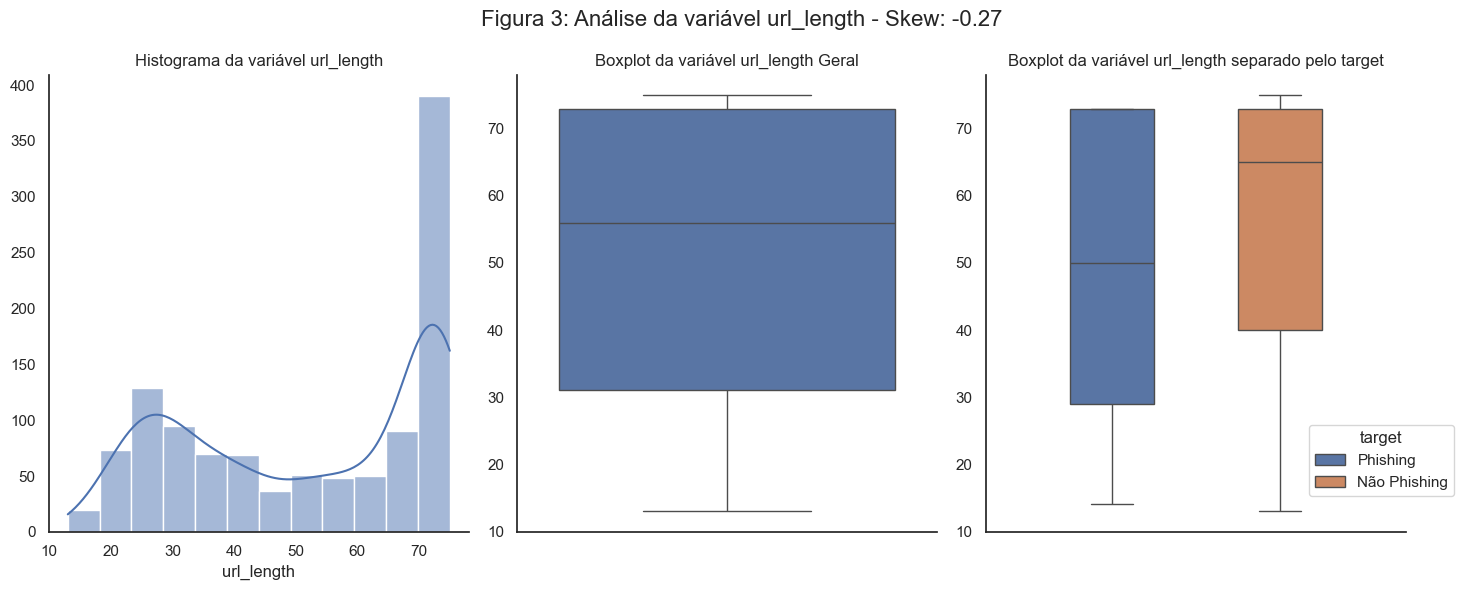

In [35]:
# Verificação da coluna 'url_length'
col = 'url_length'

# Calculando assimetria
col_ass = df[col].skew().round(2)

# Criando uma figura com tres imagens em linha
fig, axs = plt.subplots(1, 3, figsize = (15, 6))

# Primeira imagem um histograma
axs[0] = sns.histplot(data=df, x=col, ax=axs[0], kde=True)
axs[0].set_title(f'Histograma da variável {col}')
axs[0].set_ylabel('')

# Remove as bordas superior e direita
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

# Segunda imagem um boxplot
axs[1] = sns.boxplot(data=df, y=col, ax=axs[1])
axs[1].set_title(f'Boxplot da variável {col} Geral')
axs[1].set_ylabel('')

# Remove as bordas superior e direita
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

# Terceira imagem um boxplot detalhado pela variavel target
axs[2] = sns.boxplot(data=df, y=col, hue='target',ax=axs[2], gap=0.5)
axs[2].set_title(f'Boxplot da variável {col} separado pelo target')
axs[2].set_ylabel('')

# Remove as bordas superior e direita
axs[2].spines['top'].set_visible(False)
axs[2].spines['right'].set_visible(False)

# Alterando os rótulos da legenda
handles, _ = axs[2].get_legend_handles_labels()
axs[2].legend(handles, ['Phishing', 'Não Phishing'], title='target', bbox_to_anchor=(0.75, 0.25))

# Titulo da figura
fig.suptitle(f'Figura 3: Análise da variável {col} - Skew: {col_ass}', fontsize=16)

# Ajustando os layouts
plt.tight_layout()

# Visualizando a imagem
plt.show()

**Sobre a Figura**

Ao estudar a feature `'url_length'` notamos no histograma que ela tem uma distribuição bimodal, e sua medida de assimetria skew tem o valor de -0.27, geralmente valores entre -0.5 a 0.5 são considerados simétricos. Notamos que não há presença de outliers (já observado no dataframe na seção 3.2) possui uma grande variabilidade nos dados.

Além disso, no boxplot detalhado pelo target nota-se pouca diferença, realmente esta variavel não parece ter uma relevância na predição, visto que, a unica diferença notada é que URL's da classe *Phishing* tem uma variabilidade maior que a classe de URL *Não Phishing*, esta diferença é notada no "tamanho das caixas" representando o primeiro quartil e terceiro quartil. A mediana também tem um diferença significativa, onde em sites phishing fica entre 50, já em não phishings está entre 65 e 70.

#### 4.3.3 Analisando a feature 'sensitive_words_count', 'nb_or' e 'nb_com'

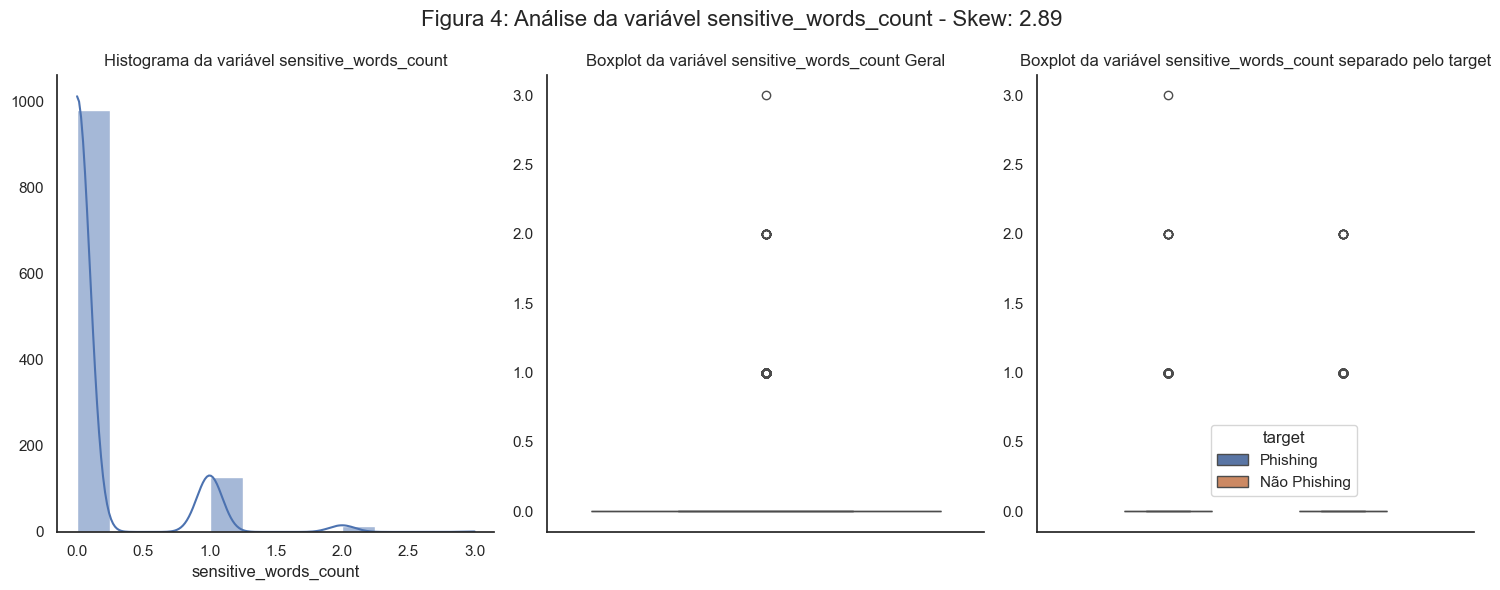

In [36]:
# Verificação da coluna 'url_length'
col = 'sensitive_words_count'

# Calculando assimetria
col_ass = df[col].skew().round(2)

# Criando uma figura com tres imagens em linha
fig, axs = plt.subplots(1, 3, figsize = (15, 6))

# Primeira imagem um histograma
axs[0] = sns.histplot(data=df, x=col, ax=axs[0], kde=True)
axs[0].set_title(f'Histograma da variável {col}')
axs[0].set_ylabel('')

# Remove as bordas superior e direita
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

# Segunda imagem um boxplot
axs[1] = sns.boxplot(data=df, y=col, ax=axs[1])
axs[1].set_title(f'Boxplot da variável {col} Geral')
axs[1].set_ylabel('')

# Remove as bordas superior e direita
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

# Terceira imagem um boxplot detalhado pela variavel target
axs[2] = sns.boxplot(data=df, y=col, hue='target',ax=axs[2], gap=0.5)
axs[2].set_title(f'Boxplot da variável {col} separado pelo target')
axs[2].set_ylabel('')

# Remove as bordas superior e direita
axs[2].spines['top'].set_visible(False)
axs[2].spines['right'].set_visible(False)

# Alterando os rótulos da legenda
handles, _ = axs[2].get_legend_handles_labels()
axs[2].legend(handles, ['Phishing', 'Não Phishing'], title='target', bbox_to_anchor=(0.75, 0.25))

# Titulo da figura
fig.suptitle(f'Figura 4: Análise da variável {col} - Skew: {col_ass}', fontsize=16)

# Ajustando os layouts
plt.tight_layout()

# Visualizando a imagem
plt.show()

**Sobre a Figura**

Ao estudar a feature `'sensitive_words_count'` podemos verificar que está é uma variável que tem uma grande proporção de numeros zerados, podemos seguir com esta feature da mesma maneira que seguimos com a feature *nb_www*, ao inves de contagem podemos criar uma feature categorica se há presença de palavras sensiveis especificadas no dicionario de dados.


Além disso algumas features na variavel 'df_dict_features' possui estas mesma caracteristica de contabilizar algo na URL e ter poucos valores unicos e geralmente com uma grande distribuição em apenas dois valores, como foi o caso da 'nb_www' que tinha 3 valores unicos, mas com grande distribuição em valores 0 e 1... esta feature 'sensitive_words_count' tem 4 valores unicos, mas sua maior distribuição é no valor 0, e tem alguma distribuição nos valores 1 e 2.... vamos verificar abaixo outras variaveis com poucos valores unicos como é caso da `nb_or` e `nb_com` que tem 4 valores unicos. 


Mas deste modo vamos analisar todas as features e qualquer uma que apresentar este comportamento vamos usar a estrategia de transformar em categorica? Não obviamente. Vamos apenas utilizar esta estrategia para poucos features com poucos valores unicos que neste caso está até 4 valores unicos. Por exemplo a proxima feature é a `nb_hyphens` que contabiliza a quantidade hifens, vamos analisar ela e a `nb_dots` mas sem ter a intenção de transforma-las, porque elas tem mais valores unicos.


A inteção é verificar o comportamento e padrão. A feature `nb_hyphens` possui 9 valores unicos, e a `nb_dots` possui 12 então talvez ignorar estes valores como estamos fazendo na 'sensitive_words_count', `nb_or` e `nb_com` e fizemos na `nb_www` pode ser perigoso, ao invés de ganhar informação podemos estar perdendo. Desta forma vamos estabelecer este limite para este dataset: Feature com até 4 valores unicos e com distribuição em apenas 2 valores vamos transformar em variáveis categoricas...

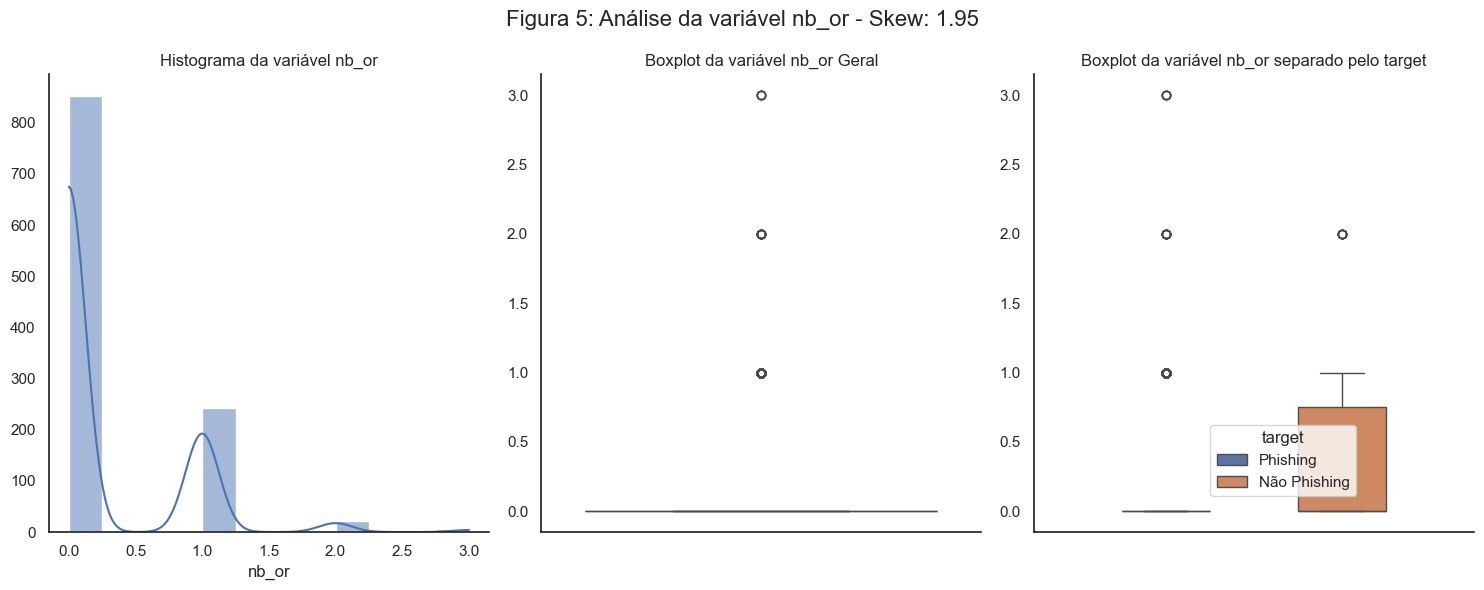

In [37]:
# Verificação da coluna 'url_length'
col = 'nb_or'

# Calculando assimetria
col_ass = df[col].skew().round(2)

# Criando uma figura com tres imagens em linha
fig, axs = plt.subplots(1, 3, figsize = (15, 6))

# Primeira imagem um histograma
axs[0] = sns.histplot(data=df, x=col, ax=axs[0], kde=True)
axs[0].set_title(f'Histograma da variável {col}')
axs[0].set_ylabel('')

# Remove as bordas superior e direita
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

# Segunda imagem um boxplot
axs[1] = sns.boxplot(data=df, y=col, ax=axs[1])
axs[1].set_title(f'Boxplot da variável {col} Geral')
axs[1].set_ylabel('')

# Remove as bordas superior e direita
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

# Terceira imagem um boxplot detalhado pela variavel target
axs[2] = sns.boxplot(data=df, y=col, hue='target',ax=axs[2], gap=0.5)
axs[2].set_title(f'Boxplot da variável {col} separado pelo target')
axs[2].set_ylabel('')

# Remove as bordas superior e direita
axs[2].spines['top'].set_visible(False)
axs[2].spines['right'].set_visible(False)

# Alterando os rótulos da legenda
handles, _ = axs[2].get_legend_handles_labels()
axs[2].legend(handles, ['Phishing', 'Não Phishing'], title='target', bbox_to_anchor=(0.75, 0.25))

# Titulo da figura
fig.suptitle(f'Figura 5: Análise da variável {col} - Skew: {col_ass}', fontsize=16)

# Ajustando os layouts
plt.tight_layout()

# Visualizando a imagem
plt.show()

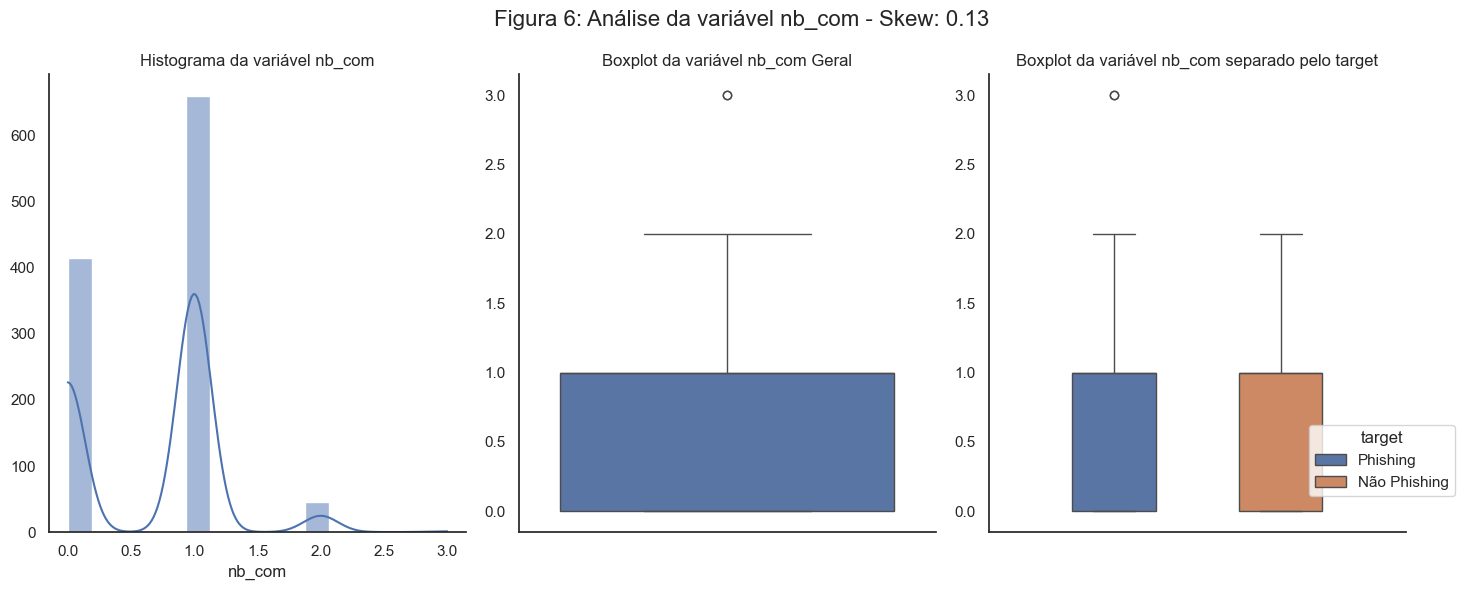

In [38]:
# Verificação da coluna 'url_length'
col = 'nb_com'

# Calculando assimetria
col_ass = df[col].skew().round(2)

# Criando uma figura com tres imagens em linha
fig, axs = plt.subplots(1, 3, figsize = (15, 6))

# Primeira imagem um histograma
axs[0] = sns.histplot(data=df, x=col, ax=axs[0], kde=True)
axs[0].set_title(f'Histograma da variável {col}')
axs[0].set_ylabel('')

# Remove as bordas superior e direita
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

# Segunda imagem um boxplot
axs[1] = sns.boxplot(data=df, y=col, ax=axs[1])
axs[1].set_title(f'Boxplot da variável {col} Geral')
axs[1].set_ylabel('')

# Remove as bordas superior e direita
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

# Terceira imagem um boxplot detalhado pela variavel target
axs[2] = sns.boxplot(data=df, y=col, hue='target',ax=axs[2], gap=0.5)
axs[2].set_title(f'Boxplot da variável {col} separado pelo target')
axs[2].set_ylabel('')

# Remove as bordas superior e direita
axs[2].spines['top'].set_visible(False)
axs[2].spines['right'].set_visible(False)

# Alterando os rótulos da legenda
handles, _ = axs[2].get_legend_handles_labels()
axs[2].legend(handles, ['Phishing', 'Não Phishing'], title='target', bbox_to_anchor=(0.75, 0.25))

# Titulo da figura
fig.suptitle(f'Figura 6: Análise da variável {col} - Skew: {col_ass}', fontsize=16)

# Ajustando os layouts
plt.tight_layout()

# Visualizando a imagem
plt.show()

**Sobre as Figuras 5 e 6**

Como já analisamos, estas features `'sensitive_words_count'`, `'nb_or'` e `'nb_com'` tem 4 valores unicos, mas a distribuição dos dados geralmente estão em apenas 2 valores unicos. Estas features conforme o dicionário de dados no inicio do notebook expressam uma quantificação, mas a maioria dos dados estão em 0 e 1. Sendo uma distribuição bimodal.

Logo, vamos tratar estas features transformando elas de variaveis numericas para categoricas, com a especificação: `'have_sensitive_words'`, `'have_or'` e `'have_com'`; Deste modo vamos transformar elas em features categoricas binárias, ajudando assim na predição do modelo de classificação.

In [39]:
# vamos tirar as feature da lista de colunas numericas
cols_num.remove('sensitive_words_count')
cols_num.remove('nb_or')
cols_num.remove('nb_com')

# Adicionar a nova feature na lista de colunas categoricas
cols_cat.append('have_sensitive_words')
cols_cat.append('have_or')
cols_cat.append('have_com')

In [40]:
# Criando a nova feature categorica 'have_sensitive_words'
df['have_sensitive_words'] = 0
df['have_sensitive_words'] = np.where(df['sensitive_words_count'] > 0, 1, 0)

# Criando a nova feature categorica 'have_or'
df['have_or'] = 0
df['have_or'] = np.where(df['nb_or'] > 0, 1, 0)

# Criando a nova feature categorica 'have_com'
df['have_com'] = 0
df['have_com'] = np.where(df['nb_com'] > 0, 1, 0)

# Excluindo as features
drop_cols = ['sensitive_words_count', 'nb_or', 'nb_com']
df = df.drop(drop_cols, axis=1)

# Verificando a exclusao
df.head()

,url_length,valid_url,path_length,isHttps,nb_dots,nb_hyphens,target,have_www,have_sensitive_words,have_or,have_com
0,67,0,44,0,5,0,0,1,0,0,1
1,73,0,0,1,5,0,1,0,0,0,0
2,73,0,0,0,5,2,0,0,0,0,0
3,73,0,50,0,9,1,0,0,1,0,1
4,73,0,51,0,5,3,0,1,0,0,1


In [41]:
# Re-calculando o df de Information Value
# Lista para o IV
iv = []

# Loop
for i in cols_cat:
    df_woe_iv = (pd.crosstab(df[i], df['target'], normalize = 'columns')
                .assign(woe = lambda dfx: np.log(dfx[1] / dfx[0]))
                .assign(iv = lambda dfx: np.sum(dfx['woe'] * (dfx[1] - dfx[0]))))
    iv.append(df_woe_iv['iv'][0])
    
# IV em dataframe
df_iv = pd.DataFrame({'Features': cols_cat, 'iv':iv}).set_index('Features').sort_values(by='iv', ascending=False)

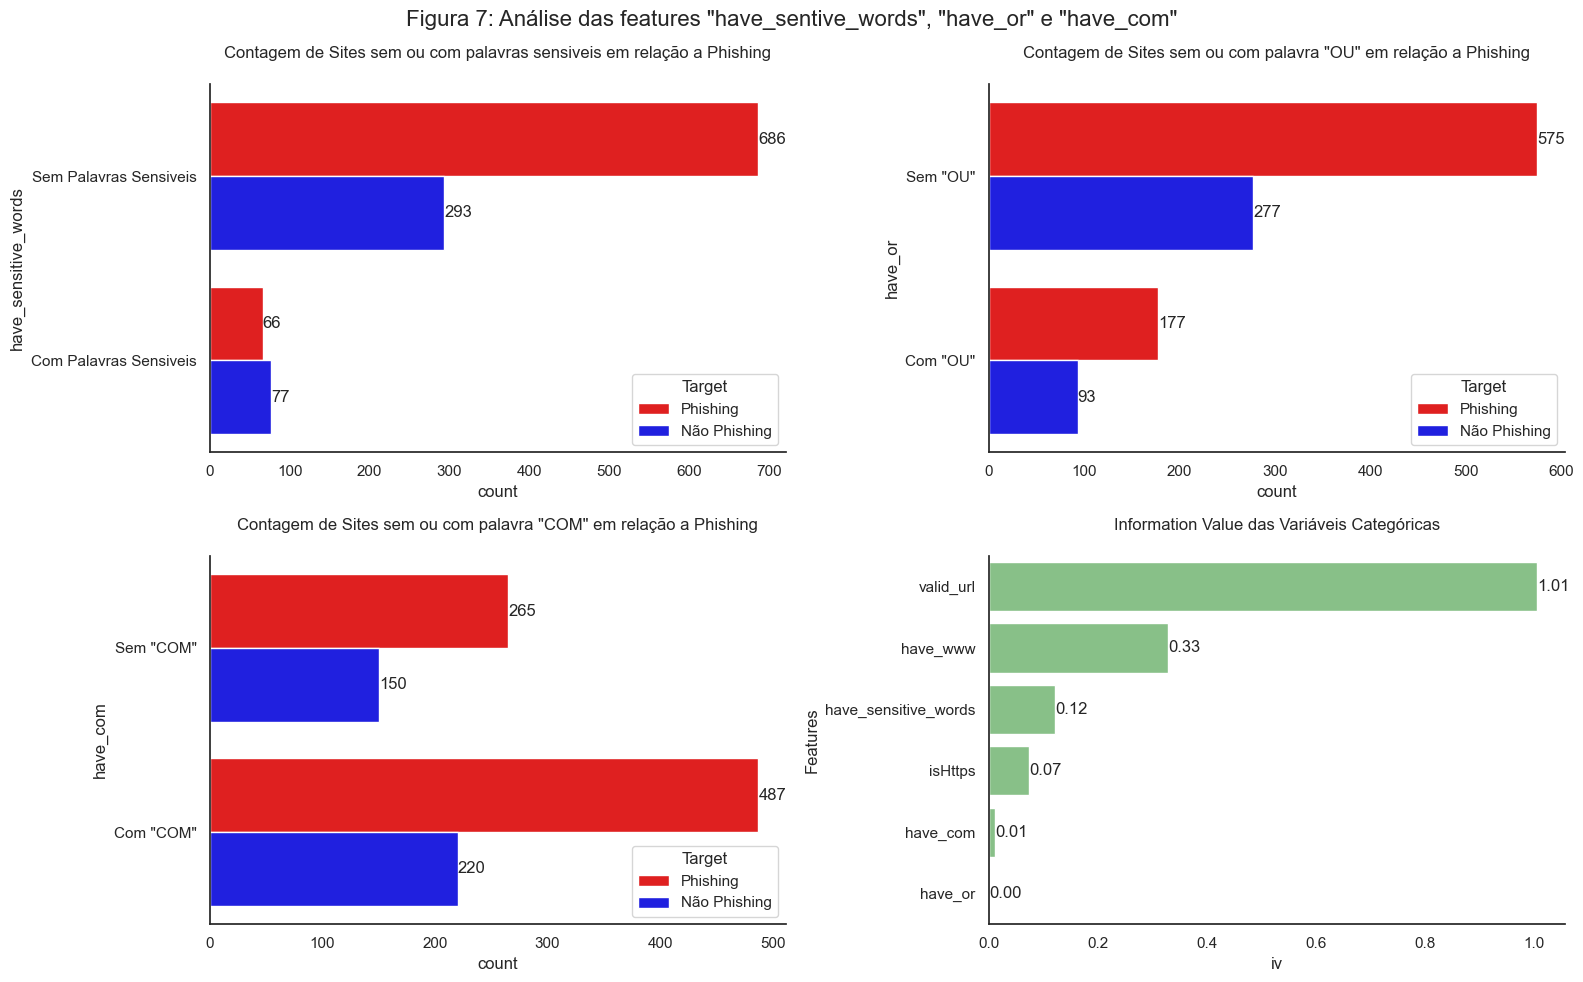

In [42]:
# Criando uma figura com tres imagens em linha
fig, axs = plt.subplots(2, 2, figsize = (16, 10))

def plot_grafico (row, col, feature):
    # Criando o grafico 1
    sns.countplot(data=df, y=feature, hue='target', palette={0: 'red', 1:'blue'}, ax=axs[row, col])

    # Remove as bordas superior e direita
    axs[row, col].spines['top'].set_visible(False)
    axs[row, col].spines['right'].set_visible(False)


    # Adiciona legenda
    axs[row, col].legend(title='Target', loc='lower right', labels=['Phishing', 'Não Phishing'])

    # Adiciona os valores ao lado das barras (evita adicionar texto para valores zero)
    for p in axs[row, col].patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()

        # Verifica se a largura é maior que zero antes de adicionar o texto
        if width > 0:
            axs[row, col].text(x + width + 0.1, y + height / 2, f'{int(width)}', ha='left', va='center')
            

# Plotando Gráfico 
plot_grafico(0, 0, 'have_sensitive_words')
            
# Adiciona rótulos ao gráfico
axs[0, 0].set_title('Contagem de Sites sem ou com palavras sensiveis em relação a Phishing\n')

# Adicionando os labels de y da variavel 'isHttps'
axs[0, 0].set_yticklabels(['Sem Palavras Sensiveis', 'Com Palavras Sensiveis'])


# Plotando Gráfico
plot_grafico(0, 1, 'have_or')
            
# Adiciona rótulos ao gráfico
axs[0, 1].set_title('Contagem de Sites sem ou com palavra "OU" em relação a Phishing\n')

# Adicionando os labels de y da variavel 'isHttps'
axs[0, 1].set_yticklabels(['Sem "OU"', 'Com "OU"'])


# Plotando Gráfico
plot_grafico(1, 0, 'have_com')
            
# Adiciona rótulos ao gráfico
axs[1, 0].set_title('Contagem de Sites sem ou com palavra "COM" em relação a Phishing\n')

# Adicionando os labels de y da variavel 'isHttps'
axs[1, 0].set_yticklabels(['Sem "COM"', 'Com "COM"'])


# Criando um gráfico de barras
sns.barplot(data=df_iv, x='iv', y='Features', ax=axs[1, 1], color='#7FC97F')

# Adiciona rótulos ao gráfico
axs[1, 1].set_title('Information Value das Variáveis Categóricas\n')

# Remove as bordas superior e direita
axs[1, 1].spines['top'].set_visible(False)
axs[1, 1].spines['right'].set_visible(False)

# Adicionando os valores ao lado das barras
for p in axs[1, 1].patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    
    # Verifica se a largura é maior que zero antes de adicionar o texto
    if width > 0:
        axs[1, 1].text(width, y + height / 2, f'{width:.2f}', ha='left', va='center')
        
# Titulo da figura
fig.suptitle('Figura 7: Análise das features "have_sentive_words", "have_or" e "have_com"', fontsize=16)

        
# Ajustando o layout        
plt.tight_layout() 
    
# Exibe o gráfico
plt.show()

**Sobre a figura**

Vamos primeiro analisar e tomar decisões com base no *Information Value* as novas variaveis `'have_com'` e `'have_or'` tem valores de predição muito fraco, bem próximo de zero; e a variavel `'have_sensitive_word'` tem uma predição considerada média. 


**A decisão** que vamos tomar é de excluir as tres features. Os motivos de `'have_com'` e `'have_or'` são bem claros, tem um valor ou relevância quase zero com base na variavel target. 

Agora referente a feature `'have_sensitive_word'` vamos olhar o primeiro gráfico: Nota-se que reduziu bastante a quantidade quando não tem palavras sensiveis e tem palavras sensiveis. Mas pensando bem, não é que reduziu o numero, na verdade, este filtro de escolher url com palavras especificas pode ser pequeno. Por exemplo, diferente da variavel `'isHttps'` a gente sabe que os numeros com o protocolo HTTPS reduziu porque o protocolo HTTPS serve para isso (https://www.godaddy.com/resources/br/artigos/o-que-e-https) isto é, ele oferece camadas de proteção e de certa maneiras estas camadas garantem a proteção. Agora a feature `'have_sensitive_word'` não tem esta caracteristica, poucas URL's vão colocar palavras especificas envolvendo segurança, não é normal que apareça ao menos. Então os numeros na feature `'have_sensitive_word'` talvez não significa que reduziu, e sim, que não é comum em URL apresentar estas palavras sensiveis. E quando ocorre ou tem a presença as destas palavras nota-se um certo equilibrio. Então este valor de IV 0.12 com predição forte está enviesada por este motivo. 

Portanto, as três features serão excluidas.

In [43]:
# Excluindo as features
drop_cols = ['have_sensitive_words', 'have_or', 'have_com']
df = df.drop(drop_cols, axis=1)

# Verificando a exclusao
df.head()

,url_length,valid_url,path_length,isHttps,nb_dots,nb_hyphens,target,have_www
0,67,0,44,0,5,0,0,1
1,73,0,0,1,5,0,1,0
2,73,0,0,0,5,2,0,0
3,73,0,50,0,9,1,0,0
4,73,0,51,0,5,3,0,1


#### 4.3.4 Analisando a feature 'nb_hyphens'

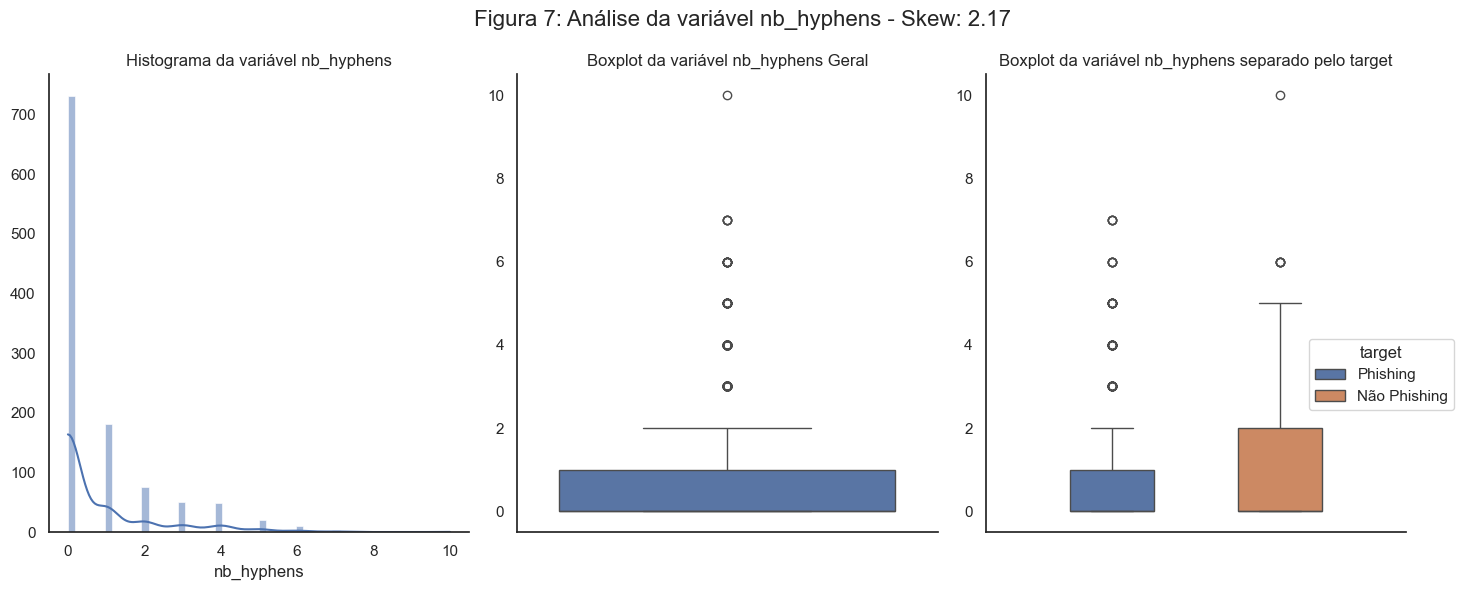

In [44]:
# Verificação da coluna 'nb_hyphens'
col = 'nb_hyphens'

# Calculando assimetria
col_ass = df[col].skew().round(2)

# Criando uma figura com tres imagens em linha
fig, axs = plt.subplots(1, 3, figsize = (15, 6))

# Primeira imagem um histograma
axs[0] = sns.histplot(data=df, x=col, ax=axs[0], kde=True)
axs[0].set_title(f'Histograma da variável {col}')
axs[0].set_ylabel('')

# Remove as bordas superior e direita
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

# Segunda imagem um boxplot
axs[1] = sns.boxplot(data=df, y=col, ax=axs[1])
axs[1].set_title(f'Boxplot da variável {col} Geral')
axs[1].set_ylabel('')

# Remove as bordas superior e direita
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

# Terceira imagem um boxplot detalhado pela variavel target
axs[2] = sns.boxplot(data=df, y=col, hue='target',ax=axs[2], gap=0.5)
axs[2].set_title(f'Boxplot da variável {col} separado pelo target')
axs[2].set_ylabel('')

# Remove as bordas superior e direita
axs[2].spines['top'].set_visible(False)
axs[2].spines['right'].set_visible(False)

# Alterando os rótulos da legenda
handles, _ = axs[2].get_legend_handles_labels()
axs[2].legend(handles, ['Phishing', 'Não Phishing'], title='target', bbox_to_anchor=(0.75, 0.25))

# Titulo da figura
fig.suptitle(f'Figura 7: Análise da variável {col} - Skew: {col_ass}', fontsize=16)

# Ajustando os layouts
plt.tight_layout()

# Visualizando a imagem
plt.show()

**Sobre a Figura**

Ao estudar a feature `'nb_hyphens'` notamos no histograma que ela tem uma distribuição assimétrica a direita ou positiva, visto que, os valores menores possuem maior presença do que valores maiores. A própria medida de *skew* indica que os dados são assimétricos positivos, com o valor de 2.17, este acima do intervalo considerado simétrico entre (-0.5, 0.5).

No boxplot podemos notar que há presença de outliers, e de maneira geral confima o que há no histograma, uma variabilidade em valores baixos. No boxplot especificado pela variavel target notamos uma diferença, sites *não-phishing* tem uma variabilidade maior na aparição de *hyphens*.

#### 4.3.5 Analisando a feature 'nb_dots'

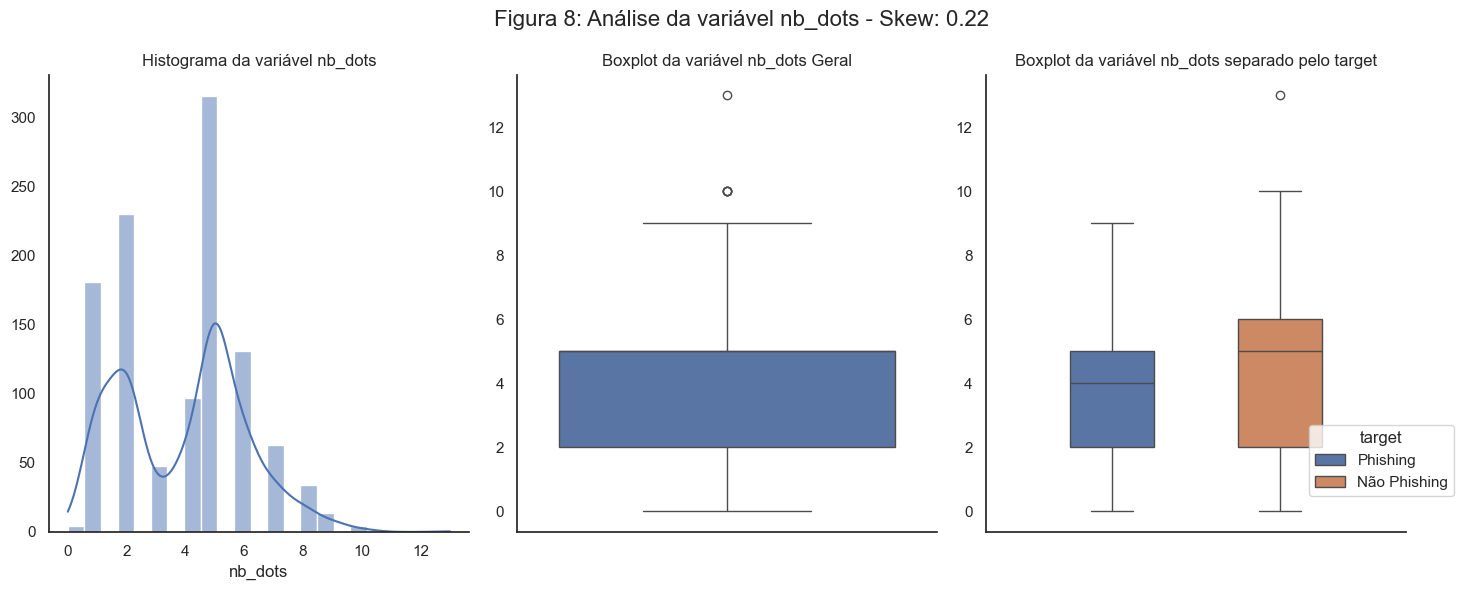

In [45]:
# Verificação da coluna 'nb_hyphens'
col = 'nb_dots'

# Calculando assimetria
col_ass = df[col].skew().round(2)

# Criando uma figura com tres imagens em linha
fig, axs = plt.subplots(1, 3, figsize = (15, 6))

# Primeira imagem um histograma
axs[0] = sns.histplot(data=df, x=col, ax=axs[0], kde=True)
axs[0].set_title(f'Histograma da variável {col}')
axs[0].set_ylabel('')

# Remove as bordas superior e direita
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

# Segunda imagem um boxplot
axs[1] = sns.boxplot(data=df, y=col, ax=axs[1])
axs[1].set_title(f'Boxplot da variável {col} Geral')
axs[1].set_ylabel('')

# Remove as bordas superior e direita
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

# Terceira imagem um boxplot detalhado pela variavel target
axs[2] = sns.boxplot(data=df, y=col, hue='target',ax=axs[2], gap=0.5)
axs[2].set_title(f'Boxplot da variável {col} separado pelo target')
axs[2].set_ylabel('')

# Remove as bordas superior e direita
axs[2].spines['top'].set_visible(False)
axs[2].spines['right'].set_visible(False)

# Alterando os rótulos da legenda
handles, _ = axs[2].get_legend_handles_labels()
axs[2].legend(handles, ['Phishing', 'Não Phishing'], title='target', bbox_to_anchor=(0.75, 0.25))

# Titulo da figura
fig.suptitle(f'Figura 8: Análise da variável {col} - Skew: {col_ass}', fontsize=16)

# Ajustando os layouts
plt.tight_layout()

# Visualizando a imagem
plt.show()

**Sobre a Figura**

Ao estudar a feature `'nb_dots'` notamos no histograma que ela tem uma distribuição bimodal, um pouco mais distribuida entre outros valores em comparação com outras features (note a diferença da distribuição bimodal desta feature para a feature *'nb_www'*, a medida skew mostra um intervalo proximo de zero indicando uma possivel simetria. Acontece que olhando o histograma e o calculo de skew, podemos notar que, embora a distribuição seja bimodal, a maior distribuição está próximo dos valores da média (entre 4 e 6), e a outra distribuição não está tão longe da média (1 a 2), logo, a media de skew está um pouco enviesada neste momento.

O boxplot de maneira geral está de acordo com o histograma, há uma variabilidade entre os valores 2 e 5, e conta com a presença de outliers. E o boxplot especificado pela variavel target notamos novamente uma variabilidade maior na classe *não-phishing*.

### 4.4 Conclusão da Análise Descritiva


In [46]:
# Verificando as atualizações
original_shape, df.shape

((1990, 14), (1122, 8))

<font size=+2>Decisões Tomadas:</font><br>

**Primeira decisão: Excluir registros duplicados**

(Explicado detalhadamente na seção 3.1.2) - Em resumo: embora tenha-se perdido mais de 44% de nosso dataset, garantimos que cada registros seja diferente um do outro, existia outras estratégias por se tratar de um dataset menor, mas embora a decisão seja um pouco radical, ela foi considerada a mais viável e benefica para o dataset levando em conta todo o risco ou prejuizo.

**Segunda decisão: Excluir colunas com valores zerados**

(Explicado detalhadamente na seção 3.1.3) - Em resumo: com base na análise exploratória, qualquer coluna com ou mais de 90% seria excluida. Esta proporção é elevada, e mesmo que contenha valores quantificativos e qualitivos isso mostraria que a feature é irrelevante para o contexto, visto que só há aquele valor ou grupo.

**Terceira decisão: Manter os outliers**

(Explicado detalhadamente na seção 3.2) - Em resumo: Embora os outliers eram poucos e poderiam ser retirados, mas nosso dataset que era pequeno foi reduzido pela primeira decisão, além disso, visto que nossas features tem quantificação, e levando o contexto do nosso problema, os outliers na verdade podem ser evidencias da nossa classe alvo.

**Quarta decisão: Transformando a feature 'nb_www'**

(Explicado detalhadamente na seção 4.3.1) - Em resumo: Dada a grande distribuição nos valores 0 e 1 (tendo 3 valores unicos) achamos melhor transformar esta variavel que era numerica, para uma variavel categorica, deste modo, criou-se a variavel `'have_www'`, sendo 1 para url com www e 0 para url sem www.

**Quinta decisão: Excluindo as features 'sensitive_words_count', 'nb_or' e 'nb_com'**

(Explicado detalhadamente na seção 4.3.3) - Em resumo: Estas tres features tinha o mesmo problema da variavel 'nb_www' citada acima (a diferença é que elas possuiam 4 valores unicos), mas ao transformar em features categoricas as duas ultimas features tinham uma relevância muito pequena, calculada atraves do *Information Value* (IV e WOE), já a variavel 'sensitive_words_count' foi um caso especial que excluimos, o principal foi a falta de relevancia tambem, porém com algumas peculariedades.  

## 5. Replicando as estratégias no conjunto de teste

In [47]:
# Salvando alterações originais para visualizar depois as alterações
original_test_shape = df_test.shape

# Visualizando as dimensoes
original_test_shape

(498, 14)

### 5.1 Excluindo dados duplicados

In [48]:
# Visualizando a quantidade dados duplicados e proporção
print(f"Quantidade dados duplicados: {df_test.duplicated().sum()}\nPrporção da exclusão: {round(df_test.duplicated().sum() / len(df_test), 2) * 100}%")

# Excluindo dados duplicados
df_test = df_test.drop_duplicates()

# Resetando indices
df_test = df_test.reset_index()

# Visualizando as alterações
print(df_test.shape)

Quantidade dados duplicados: 132
Prporção da exclusão: 27.0%
(366, 15)


### 5.2 Transformando a coluna 'nb_www'

Como visto na seção 4.3.1 temos de transformar a variavel nb_www para have_www

In [49]:
# Criando a nova feature categorica
df_test['have_www'] = 0
df_test['have_www'] = np.where(df_test['nb_www'] > 0, 1, 0)

### 5.3 Mantendo as mesmas colunas de treino para teste

In [50]:
# Filtrando as colunas do dataset de treino para o dataset de teste
df_test = df_test[df.columns]

In [51]:
# Verificando as alterações
df_test

,url_length,valid_url,path_length,isHttps,nb_dots,nb_hyphens,target,have_www
0,74,1,22,1,8,0,1,0
1,37,0,12,0,3,0,0,1
2,26,0,6,0,1,0,0,0
3,23,1,0,0,1,1,1,0
4,73,0,46,1,5,0,0,0
...,...,...,...,...,...,...,...,...
361,29,1,2,0,1,0,1,0
362,25,0,0,0,1,0,0,0
363,73,0,49,0,6,0,0,0
364,56,0,27,0,4,0,1,0


In [52]:
# Verificando as dimensoes originais para as atuais
original_test_shape, df_test.shape

((498, 14), (366, 8))

In [53]:
# Verificando as dimensoes de treino e teste
df.shape, df_test.shape

((1122, 8), (366, 8))

## 6. Salvando os dataset's de treino e teste


Este dataset's já tratados e estando na mesma dimensão vamos usá-los em novo notebook de modelagem.

Salvaremos estes dataset's em formato *pickle* para manter a mesma formatação usadas, desta forma, no dataset de modelagem a importação destes datasets será como um seguimento deste notebook

In [54]:
# Salvando os dados para um notebook de modelagem
# dataset treino
df.to_pickle('data/df_train.pkl')

# Dataset Teste
df_test.to_pickle('data/df_test.pkl')